In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

# models
from sklearn.linear_model import LogisticRegression

In [2]:
!pip install imblearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.6 MB/s eta 0:00:0000:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [37]:
def calc_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    reca = recall_score(y_true, y_pred)
    f1_sc = f1_score(y_true, y_pred)
    
    print("Accuracy : {:.4f}".format(acc))
    print("Precision: {:.4f}".format(prec))
    print("Recall   : {:.4f}".format(reca))
    print("F1-score : {:.4f}".format(f1_sc))
    print()
    
    return {"Accuracy": acc, "Precision": prec, "Recall": reca, "F1-score": f1_sc}

def calc_mean_metrics(metrics_list):
    metrics_df = pd.DataFrame(metrics_list)
    display(metrics_df.mean())


In [38]:
# Import the necessary libraries
import pandas as pd

# Read the credit card fraud dataset from a CSV file on your computer

data_df =pd.read_csv("/Users/rshakari/Downloads/Fraud detection/creditcard.csv")

# Print the number of rows in the dataset
print("Number of records: {}".format(len(data_df)))

# Calculate and print the positive class rate of the "Class" column in the dataset
print("Positive class rate: {:.3f}%".format(data_df.Class.mean()*100))



Number of records: 284807
Positive class rate: 0.173%


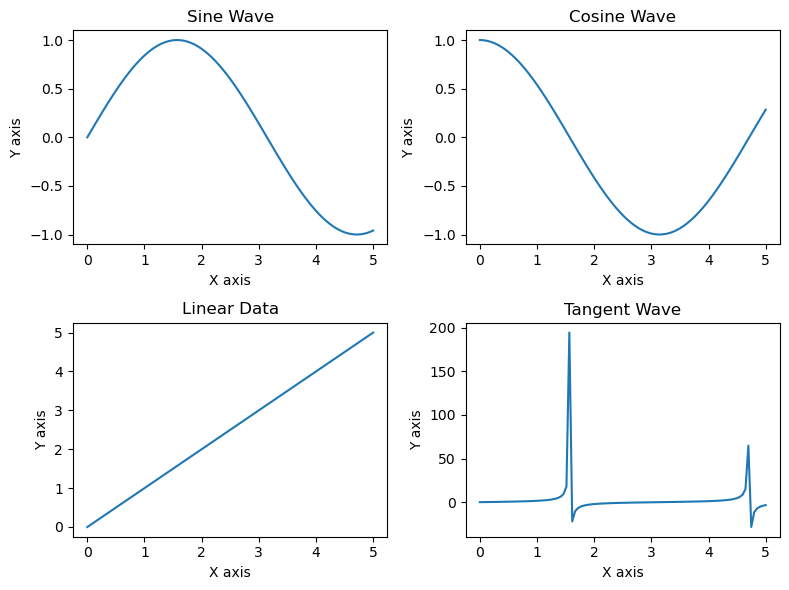

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot a function on a given subplot
def plot_function(ax, func, label):
    x = np.linspace(0, 5, 100)
    ax.plot(x, func(x))
    ax.set_title(label)
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")

# Create a Figure with 2 rows and 2 columns of subplots:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Plot functions on each subplot
plot_function(axes[0, 0], np.sin, "Sine Wave")
plot_function(axes[1, 0], lambda x: x, "Linear Data")
plot_function(axes[0, 1], np.cos, "Cosine Wave")
plot_function(axes[1, 1], np.tan, "Tangent Wave")

# Add padding between subplots
fig.tight_layout()

plt.show()




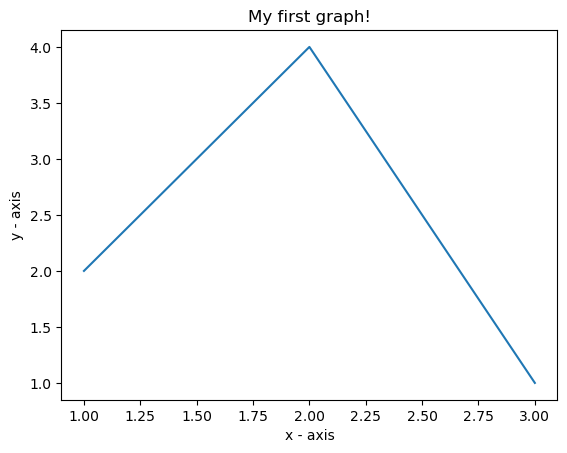

In [17]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = [1,2,3]
# corresponding y axis values
y = [2,4,1]

# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')

# giving a title to my graph
plt.title('My first graph!')

# function to show the plot
plt.show()


In [40]:
data_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
from sklearn.model_selection import train_test_split

# Split the data into training/validation and test sets
train_val_data_df, test_data_df = train_test_split(data_df.drop("Time", axis=1), random_state=0, shuffle=True, stratify=data_df["Class"])

# Print the shapes of the resulting data sets
print("Train/Validation Data Shape: {}".format(train_val_data_df.shape))
print("Test Data Shape: {}".format(test_data_df.shape))



Train/Validation Data Shape: (213605, 30)
Test Data Shape: (71202, 30)


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd

# Define functions for calculating metrics and their means
def calc_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    reca = recall_score(y_true, y_pred)
    f1_sc = f1_score(y_true, y_pred)
    
    print("ACC       : {:.4f}".format(acc))
    print("Precision : {:.4f}".format(prec))
    print("Recall    : {:.4f}".format(reca))
    print("F1        : {:.4f}".format(f1_sc))
    print()
    
    return {"ACC": acc, "Precision": prec, "Recall": reca, "F1": f1_sc}

def calc_mean_metrics(metrics_list):
    metrics_df = pd.DataFrame(metrics_list)
    display(metrics_df.mean())

cw = {0: 1.0, 1:1/1e-6}
threshold = 0.6

metrics_list = []

kf = StratifiedKFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X_train_val, y_train_val):
    X_train = X_train_val.iloc[train_index]
    y_train = y_train_val.iloc[train_index]
    
    X_val = X_train_val.iloc[val_index]
    y_val = y_train_val.iloc[val_index]
    
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    
    model = LogisticRegression(class_weight=cw, max_iter=500)
    model.fit(X_train_scaled, y_train)
    
    X_val_scaled = scaler.transform(X_val)
    pred_val = model.predict_proba(X_val_scaled)[:,1]
    
    met_list = calc_metrics(y_val, pred_val>threshold)
    metrics_list.append(met_list)
    
calc_mean_metrics(metrics_list)


ACC       : 0.5819
Precision : 0.0040
Recall    : 0.9726
F1        : 0.0079

ACC       : 0.6898
Precision : 0.0053
Recall    : 0.9595
F1        : 0.0106

ACC       : 0.7067
Precision : 0.0056
Recall    : 0.9459
F1        : 0.0111

ACC       : 0.5840
Precision : 0.0041
Recall    : 0.9865
F1        : 0.0081

ACC       : 0.6200
Precision : 0.0043
Recall    : 0.9459
F1        : 0.0086



ACC          0.636502
Precision    0.004647
Recall       0.962088
F1           0.009248
dtype: float64

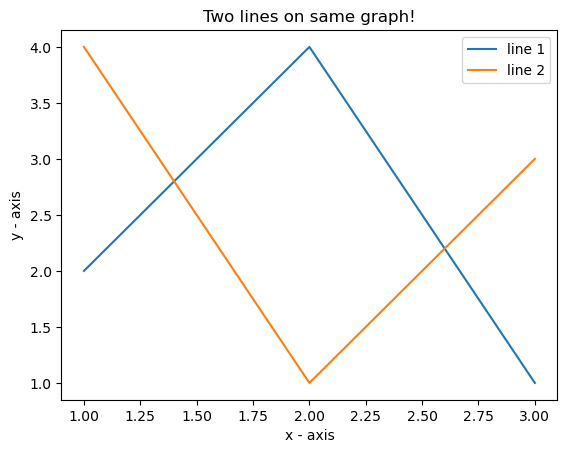

In [25]:
import matplotlib.pyplot as plt

# line 1 points
x1 = [1,2,3]
y1 = [2,4,1]
# plotting the line 1 points
plt.plot(x1, y1, label = "line 1")

# line 2 points
x2 = [1,2,3]
y2 = [4,1,3]
# plotting the line 2 points
plt.plot(x2, y2, label = "line 2")

# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
# giving a title to my graph
plt.title('Two lines on same graph!')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()


In [ ]:
#Upsampling


In [26]:
cw = {0: 1.0, 1:1/0.02}
threshold = 0.8

metrics_list = []

kf = StratifiedKFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X_train_val, y_train_val):
    ad = ADASYN(sampling_strategy=0.2)
    
    X_train = X_train_val.iloc[train_index]
    y_train = y_train_val.iloc[train_index]
    
    X_val = X_train_val.iloc[val_index]
    y_val = y_train_val.iloc[val_index]
    
    X_train_ad, y_train_ad = ad.fit_resample(X_train, y_train)
    
    scaler = StandardScaler().fit(X_train_ad)
    X_train_scaled = scaler.transform(X_train_ad)
    
    model = LogisticRegression(class_weight=cw, max_iter=500)
    model.fit(X_train_scaled, y_train_ad)
    
    X_val_scaled = scaler.transform(X_val)
    pred_val = model.predict_proba(X_val_scaled)[:,1]
    
    met_list = calc_metrics(y_val, pred_val>threshold)
    metrics_list.append(met_list)
    
calc_mean_metrics(metrics_list)

ACC       : 0.8868
Precision : 0.0143
Recall    : 0.9589
F1        : 0.0281

ACC       : 0.9123
Precision : 0.0184
Recall    : 0.9459
F1        : 0.0360

ACC       : 0.9021
Precision : 0.0167
Recall    : 0.9595
F1        : 0.0328

ACC       : 0.9274
Precision : 0.0209
Recall    : 0.8919
F1        : 0.0408

ACC       : 0.9029
Precision : 0.0171
Recall    : 0.9730
F1        : 0.0335



ACC          0.906290
Precision    0.017457
Recall       0.945835
F1           0.034267
dtype: float64

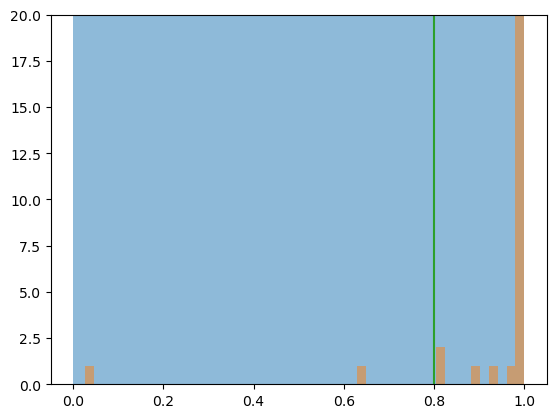

In [27]:
pred_true = pred_val[y_val>0.5]
pred_false = pred_val[y_val<0.5]

plt.hist(pred_false, alpha=0.5, bins=50)
plt.hist(pred_true, alpha=0.5, bins=50)
plt.plot([threshold, threshold], [0.0,30.0])
plt.ylim([0.0,20.0])

plt.show()

In [ ]:
#Downsampling¶


In [28]:
cw = {0: 1.0, 1:1/0.02}
threshold = 0.5

metrics_list = []
rus = RandomUnderSampler()
kf = StratifiedKFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X_train_val, y_train_val):
    X_train = X_train_val.iloc[train_index]
    y_train = y_train_val.iloc[train_index]
    
    X_val = X_train_val.iloc[val_index]
    y_val = y_train_val.iloc[val_index]
    
    #sampling_rate = 1/(y_train<0.5).sum()

    X_train, y_train = rus.fit_resample(X_train, y_train)
    #sampling_rate *= (y_train<0.5).sum()
    #scaler = StandardScaler().fit(X_train)
    #X_train_scaled = scaler.transform(X_train)
    
    model = LogisticRegression(class_weight=cw, max_iter=900)
    model.fit(X_train, y_train)
    
    #X_val_scaled = scaler.transform(X_val)
    #pred_val = model.predict_proba(X_val_scaled)[:,1]
    pred_val = model.predict_proba(X_val)[:,1]
    #pred_val = pred_val/(pred_val+(pred_val + (1/pred_val)/sampling_rate))
    
    met_list = calc_metrics(y_val, pred_val>threshold)
    metrics_list.append(met_list)
    
calc_mean_metrics(metrics_list)

ACC       : 0.5884
Precision : 0.0041
Recall    : 0.9863
F1        : 0.0081

ACC       : 0.6429
Precision : 0.0048
Recall    : 0.9865
F1        : 0.0095



/Users/rshakari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACC       : 0.6308
Precision : 0.0045
Recall    : 0.9730
F1        : 0.0090

ACC       : 0.7026
Precision : 0.0056
Recall    : 0.9595
F1        : 0.0111

ACC       : 0.6259
Precision : 0.0045
Recall    : 0.9730
F1        : 0.0089



ACC          0.638131
Precision    0.004686
Recall       0.975639
F1           0.009327
dtype: float64

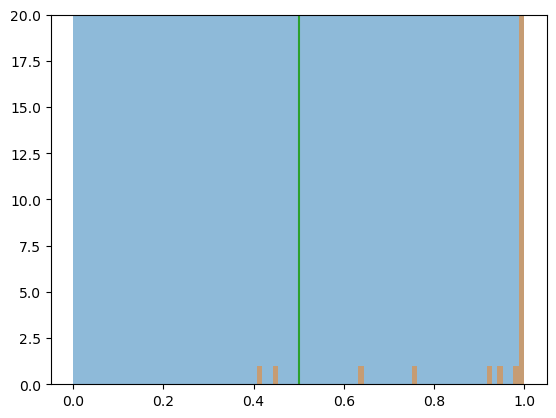

In [29]:
pred_true = pred_val[y_val>0.5]
pred_false = pred_val[y_val<0.5]

plt.hist(pred_false, alpha=0.5, bins=50)
plt.hist(pred_true, alpha=0.5, bins=50)
plt.plot([threshold, threshold], [0.0,30.0])
plt.ylim([0.0,20.0])

plt.show()

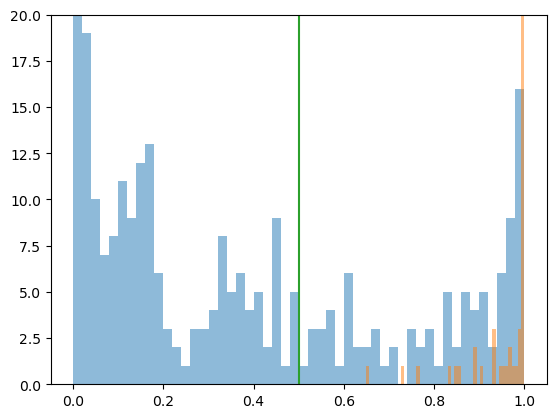

In [30]:
p = model.predict_proba(X_train)[:,1]

pred_true = p[y_train>0.5]
pred_false = p[y_train<0.5]

plt.hist(pred_false, alpha=0.5, bins=50)
plt.hist(pred_true, alpha=0.5, bins=50)
plt.plot([threshold, threshold], [0.0,30.0])
plt.ylim([0.0,20.0])

plt.show()

In [31]:
cw = {0: 1.0, 1:1/0.02}
threshold = 0.5

metrics_list = []

kf = StratifiedKFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X_train_val, y_train_val):
    X_train = X_train_val.iloc[train_index]
    y_train = y_train_val.iloc[train_index]
    
    X_val = X_train_val.iloc[val_index]
    y_val = y_train_val.iloc[val_index]
    
    model = LogisticRegression(class_weight=cw, max_iter=900)
    model.fit(X_train, y_train)
    
    pred_val = model.predict_proba(X_val)[:,1]
    
    met_list = calc_metrics(y_val, pred_val>threshold)
    metrics_list.append(met_list)
    
calc_mean_metrics(metrics_list)

ACC       : 0.9980
Precision : 0.4626
Recall    : 0.9315
F1        : 0.6182

ACC       : 0.9983
Precision : 0.5133
Recall    : 0.7838
F1        : 0.6203

ACC       : 0.9979
Precision : 0.4452
Recall    : 0.8784
F1        : 0.5909

ACC       : 0.9981
Precision : 0.4677
Recall    : 0.7838
F1        : 0.5859

ACC       : 0.9980
Precision : 0.4583
Recall    : 0.8919
F1        : 0.6055



ACC          0.998067
Precision    0.469428
Recall       0.853869
F1           0.604155
dtype: float64

In [32]:
print(len(X_train))
print(y_train.mean())

170884
0.0017263172678542169


In [33]:
cw = {0: 1.0, 1:1/1e-4}
model = LogisticRegression(class_weight=cw, max_iter=1000)
model.fit(X_train, y_train)
pred_train = model.predict_proba(X_train)[:,1]

/Users/rshakari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


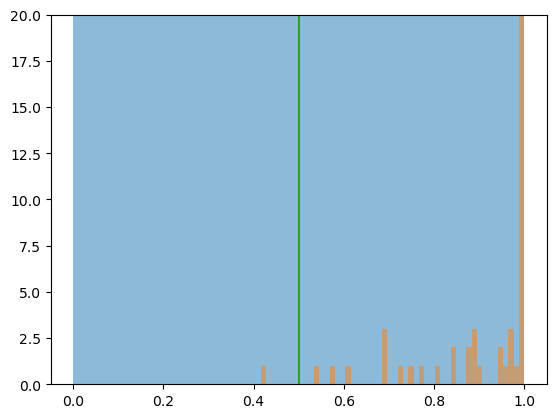

In [34]:
pred_true = pred_train[y_train>0.5]
pred_false = pred_train[y_train<0.5]

plt.hist(pred_false, alpha=0.5, bins=50)
plt.hist(pred_true, alpha=0.5, bins=50)
plt.plot([threshold, threshold], [0.0,30.0])
plt.ylim([0.0,20.0])

plt.show()

In [35]:
def step_train(X, y):
    cw = {0: 1.0, 1:1/1e-4}
    model = LogisticRegression(class_weight=cw, max_iter=1000)
    model.fit(X, y)
    pred = model.predict_proba(X)[:,1]
    
    threshold = pred[y>0.5].min() - 1e-6
    
    X_new = X[pred > threshold]
    y_new = y[pred > threshold]
    
    continue_step = (pred < threshold).sum() > 0
    print((pred < threshold).sum())
    
    if not continue_step:
        threshold = np.percentile(pred[y>0.5], q=18) - 1e-6
        
    return X_new, y_new, model, threshold, continue_step

def step_val(X, y, model, threshold, final_step=False):
    pred = model.predict_proba(X)[:, 1]
    y_neg = y[pred <= threshold]
    pred_neg = np.zeros_like(y_neg)
    
    if final_step:
        y_pos = y[pred > threshold]
        pred_pos = np.ones_like(y_pos)
        
        pred_final = np.concatenate([pred_neg, pred_pos])
        y_final = np.concatenate([y_neg, y_pos])
        return None, None, pred_final, y_final
    else:
        X_new = X[pred > threshold]
        y_new = y[pred > threshold]

        return X_new, y_new, pred_neg, y_neg

In [36]:
metrics_list = []

kf = StratifiedKFold(n_splits=5, shuffle=True)
for train_index, val_index in kf.split(X_train_val, y_train_val):
    models = []
    th_list = []
    
    X_train = X_train_val.iloc[train_index]
    y_train = y_train_val.iloc[train_index]
    
    X_val = X_train_val.iloc[val_index]
    y_val = y_train_val.iloc[val_index]
    
    c = True
    steps = 1
    while c:
        print("Train {} step".format(steps))
        pre_count = len(X_train)
        X_train, y_train, model, threshold, c = step_train(X_train, y_train)
        print("rate: {:.3f}".format(len(X_train)/pre_count))

        models.append(model)
        th_list.append(threshold)
        
        steps += 1
    
    pred_val = np.array([])
    y_val_tmp = np.array([])
    for i in range(len(models)-1):
        X_val, y_val, pred, y = step_val(X_val, y_val, models[i], th_list[i])
        pred_val = np.concatenate([pred_val, pred])
        y_val_tmp = np.concatenate([y_val_tmp, y])
    
    X_val, y_val, pred, y = step_val(X_val, y_val, models[-1], th_list[-1], final_step=True)
    pred_val = np.concatenate([pred_val, pred])
    y_val_tmp = np.concatenate([y_val_tmp, y])
    
    met_list = calc_metrics(y_val_tmp, pred_val)
    metrics_list.append(met_list)
    
calc_mean_metrics(metrics_list)

Train 1 step


/Users/rshakari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


113391
rate: 0.336
Train 2 step
9247
rate: 0.839
Train 3 step
3609
rate: 0.925
Train 4 step
359
rate: 0.992
Train 5 step
2
rate: 1.000
Train 6 step
0
rate: 1.000
ACC       : 0.9986
Precision : 0.5728
Recall    : 0.8082
F1        : 0.6705

Train 1 step


/Users/rshakari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


110578
rate: 0.353
Train 2 step


/Users/rshakari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3913
rate: 0.935
Train 3 step


/Users/rshakari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


369
rate: 0.993
Train 4 step


/Users/rshakari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1
rate: 1.000
Train 5 step
1
rate: 1.000
Train 6 step
0
rate: 1.000
ACC       : 0.9983
Precision : 0.5042
Recall    : 0.8108
F1        : 0.6218

Train 1 step


/Users/rshakari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


127224
rate: 0.255
Train 2 step


/Users/rshakari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7088
rate: 0.838
Train 3 step
1247
rate: 0.966
Train 4 step


/Users/rshakari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4
rate: 1.000
Train 5 step
11
rate: 1.000
Train 6 step
4
rate: 1.000
Train 7 step
0
rate: 1.000
ACC       : 0.9986
Precision : 0.5701
Recall    : 0.8243
F1        : 0.6740

Train 1 step


/Users/rshakari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


144478
rate: 0.155
Train 2 step
6177
rate: 0.766
Train 3 step
2565
rate: 0.873
Train 4 step
509
rate: 0.971
Train 5 step
0
rate: 1.000
ACC       : 0.9992
Precision : 0.7808
Recall    : 0.7703
F1        : 0.7755

Train 1 step
117499
rate: 0.312
Train 2 step
5709
rate: 0.893
Train 3 step
1867
rate: 0.961
Train 4 step
97
rate: 0.998
Train 5 step
7
rate: 1.000
Train 6 step
23
rate: 0.999
Train 7 step
34
rate: 0.999
Train 8 step
12
rate: 1.000
Train 9 step
2
rate: 1.000
Train 10 step
0
rate: 1.000
ACC       : 0.9985
Precision : 0.5339
Recall    : 0.8514
F1        : 0.6563



ACC          0.998647
Precision    0.592366
Recall       0.812995
F1           0.679602
dtype: float64